In [3]:
import pypff, os
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
%matplotlib widget

### Get pff files

In [4]:
files = sorted(glob('*.pff'))

### Read the file

In [5]:
pff = pypff.io.datapff(files[-1])
data, metadata = pff.readpff(metadata=True)

### Plot the data

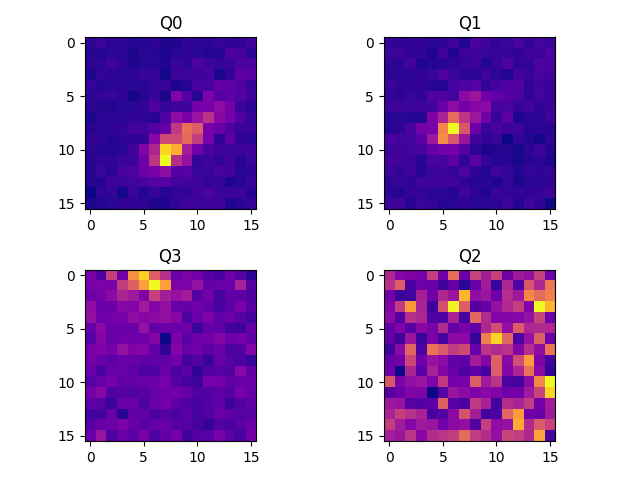

In [18]:
# get quabo_num from metadata, so that we know the packet is from which Quabo
quabo_num = metadata['quabo_num']

# skip the first 9 packets.
# it's just for test.
# there is nothing special for this.
skip = 9

# plot data from four ph packets
fig = plt.figure()
for i in range(4):
    ind = quabo_num[i+skip]+1
    if ind == 3:
        ind = 4
    elif ind == 4:
        ind =3
    subfig = fig.add_subplot(2,2,ind)
    matrix = data[i+skip].reshape((16, 16))
    im = subfig.imshow(matrix, cmap='plasma', interpolation='nearest')
    subfig.set_title('Q%d'%quabo_num[i+skip])
    
plt.tight_layout()
plt.show()

### Check metadata

In [38]:
# get the keys from the metadata
## quabo_num: it shows the pacekt is from which quabo;
## pkt_num: pkt number. we can know if we have pkt loss;
## pkt_tai: White Rabbit time - not useful for the Palomar telescopes;
## pkt_nsec: White Rabbit time - not useful for the Palomar telescopes;
## tv_sec: timestamp from local machine - unit is second;
## tv_usec: timestamp from local machine - unit is micro second.
metadata.keys()

dict_keys(['quabo_num', 'pkt_num', 'pkt_tai', 'pkt_nsec', 'tv_sec', 'tv_usec'])

In [20]:
# get the timestamp from tv_sec and tv_usec.
timestamp = metadata['tv_sec'] + metadata['tv_usec']*10**-6

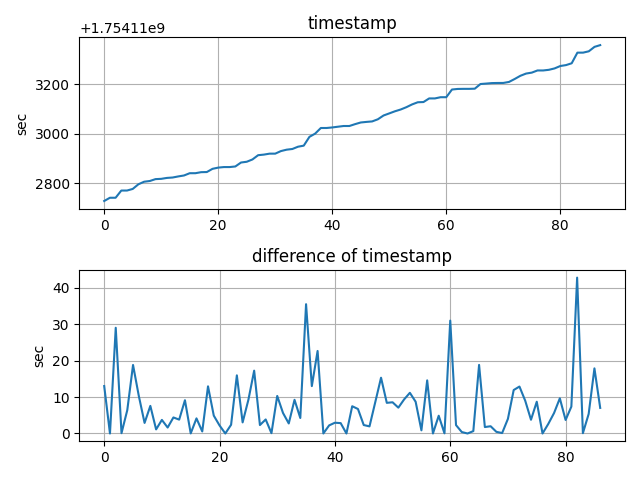

In [22]:
# plot timestamp
fig1 = plt.figure()
subfig1 = fig1.add_subplot(211)
subfig1.plot(timestamp)
subfig1.set_title('timestamp')
subfig1.set_ylabel('sec')
subfig1.grid(True)
subfig2 = fig1.add_subplot(212)
subfig2.plot(np.diff(timestamp))
subfig2.set_title('difference of timestamp')
subfig2.set_ylabel('sec')
subfig2.grid(True)
plt.tight_layout()